In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
#import the dataset, check size and columns
data = pd.read_excel (r'C:\Users\panda\python\Spotify_Dataset.xlsx', index_col=1)
data = data.dropna()
print(data.shape)
print(list(data.columns))
print(data.ndim)

(99999, 20)
['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play', 'short_pause_before_play', 'long_pause_before_play', 'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']
2


In [7]:
data.head()

,session_id,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
session_position,,,,,,,,,,,,,,,,,,,,
1,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_f56065b2-b26f-4080-a121-ff3bf5d25fd6,False,False,False,True,0,0,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,trackdone
2,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_447a276d-5b3d-44cf-bcbe-834ad91e7b72,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,trackdone,fwdbtn
3,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_07a8a863-2f51-4e64-ae3c-2fac451a0651,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn
4,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_d2a13f32-05a8-4f7b-8633-4ed8a74ca560,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn
5,1_0000015a-8bee-425e-bc96-25042a1a1cab,20,t_0368bff8-85c0-4162-b1ca-18c526b14d3a,False,False,True,False,0,1,0,0,0,0,False,19,2018-07-15,True,radio,fwdbtn,fwdbtn


In [13]:
#y — has the user played the song? (binary: “1”, means “Yes”, “0” means “No”)
#to make this more clear, we just use the not_skipped variable, which is a Boolean
data.dtypes

session_id                                 object
session_position                            int64
session_length                              int64
track_id_clean                             object
skip_1                                       bool
skip_2                                       bool
skip_3                                       bool
not_skipped                                  bool
context_switch                              int64
no_pause_before_play                        int64
short_pause_before_play                     int64
long_pause_before_play                      int64
hist_user_behavior_n_seekfwd                int64
hist_user_behavior_n_seekback               int64
hist_user_behavior_is_shuffle                bool
hour_of_day                                 int64
date                               datetime64[ns]
premium                                      bool
context_type                               object
hist_user_behavior_reason_start            object


In [34]:
data = data.drop(['skip_1', 'skip_2', 'skip_3'], axis=1)
#there is a problem to be fixed fucking here

In [8]:
data['not_skipped'].value_counts()

False    66126
True     33873
Name: not_skipped, dtype: int64

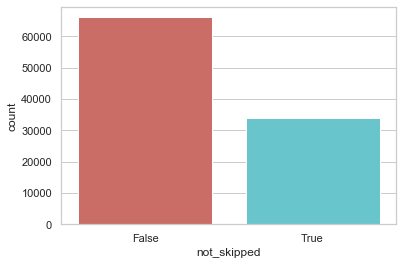

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='not_skipped', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_skipped=len(data[data['not_skipped']==False])
count_played=len(data[data['not_skipped']==True])
pct_skipped=count_skipped/(count_skipped+count_played)
print('the percentage of songs skipped is', pct_skipped*100)
pct_played=count_played/(count_played+count_skipped)
print('the percentage of songs fully played is', pct_played*100)

the percentage of songs skipped is 66.12666126661266
the percentage of songs fully played is 33.87333873338733


In [14]:
data.groupby('not_skipped').mean()

,session_length,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium
not_skipped,,,,,,,,,,,,,
False,17.628391,0.591114,0.745062,0.971327,0.038306,0.688988,0.175166,0.194432,0.074010,0.043538,0.313145,13.852524,0.808063
True,17.359224,0.000000,0.000000,0.000000,0.053405,0.753698,0.074661,0.113247,0.012222,0.074956,0.276533,13.591267,0.816698


In [ ]:
#let's go for some data exploring

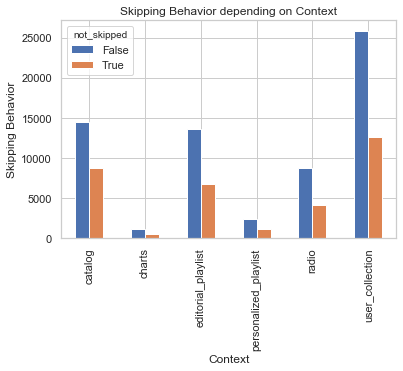

In [15]:
%matplotlib inline
pd.crosstab(data.context_type,data.not_skipped).plot(kind='bar')
plt.title('Skipping Behavior depending on Context')
plt.xlabel('Context')
plt.ylabel('Skipping Behavior')
plt.savefig('skip_per_context')
#we can see it depends quite a bit on the context, with high skipping especially within the user library

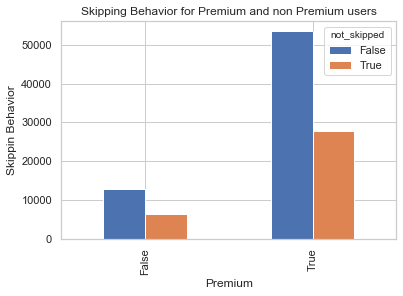

In [16]:
pd.crosstab(data.premium, data.not_skipped).plot(kind='bar')
plt.title('Skipping Behavior for Premium and non Premium users')
plt.xlabel('Premium')
plt.ylabel('Skippin Behavior')
plt.savefig('ski_premium')
#we can observe a strongly different outcome based on the subscription

In [7]:
data['premium'].value_counts()

True     81098
False    18901
Name: premium, dtype: int64

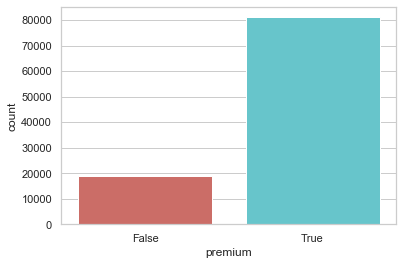

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot(x='premium', data=data, palette='hls')
plt.show()
plt.savefig('premium_users')
#to explain the difference between skippng behavior we take into account the distribution of premium users

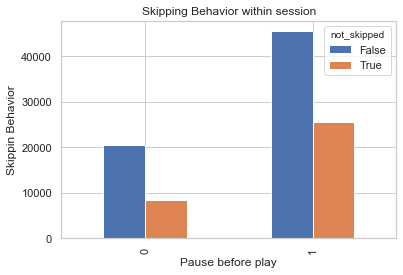

In [12]:
pd.crosstab(data.no_pause_before_play, data.not_skipped).plot(kind='bar')
plt.title('Skipping Behavior within session')
plt.xlabel('Pause before play')
plt.ylabel('Skippin Behavior')
plt.savefig('ski_premium')
#we can observe that after a pause the songs are skipped more 

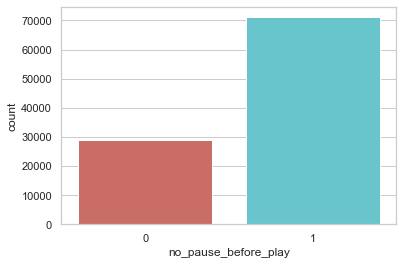

<Figure size 432x288 with 0 Axes>

In [15]:
sns.countplot(x='no_pause_before_play', data=data, palette='hls')
plt.show()
plt.savefig('no_pause_before_play')
#much more pauses 

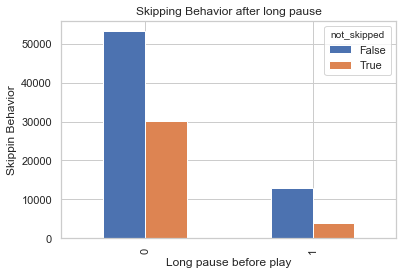

In [13]:
pd.crosstab(data.long_pause_before_play, data.not_skipped).plot(kind='bar')
plt.title('Skipping Behavior after long pause')
plt.xlabel('Long pause before play')
plt.ylabel('Skippin Behavior')
plt.savefig('skip_long_pause')
#less likely to skip after 

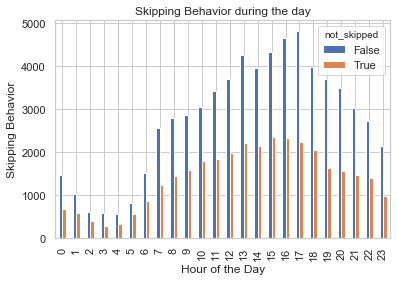

In [16]:
pd.crosstab(data.hour_of_day, data.not_skipped).plot(kind='bar')
plt.title('Skipping Behavior during the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Skipping Behavior')
plt.savefig('skip_hour_day')
#we can observe a clearly increasing trend from 7 that reaches the peak at 17 and then decreases again, let's how the usage is distributed

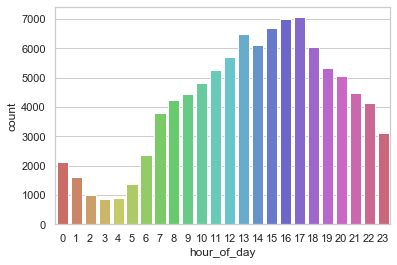

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(x='hour_of_day', data=data, palette='hls')
plt.show()
plt.savefig('hours')
#we observe that the usage during the day totally reflects the skipping behavior, thus hour of the day is not a good predictor

In [ ]:
#time to move on to real shit, i.e. define x and y 
X = df[['session_id', 'session_length', 'track_id_clean', 'skip_1', 'skip_2', 'skip_3',
        'context_switch', 'no_pause_before_play', 'short_pause_before_play', 'long_pause_before_play',
        'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
        'hour_of_day', 'date', 'premium', 'context_type', 'hist_user_behavior_reason_start', 
        'hist_user_behavior_reason_end']]
Y = df['not_skipped']